In [53]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns

from moscot.problems.time._lineage import TemporalProblem
from moscot.backends.ott._solver import SinkhornSolver

In [41]:
from importlib import reload

import sys
sys.path.append('/home/icb/manuel.gander/moscotTime_Reproducibility/Notebooks/Python_notebooks')
import Utils

Utils=reload(Utils)

In [3]:
Path="/home/icb/manuel.gander/moscotTime_Reproducibility/Data"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

In [6]:
i=4
ts0=ts[i]
ts1=ts[i+1]

adata=sc.read(f"{Path}/anndatas/Comb_anndatas/adata_{ts0}_{ts1}.h5ad")

del adata.raw
time_tuple=tuple(sorted(set(adata.obs['day'])))

Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].


In [7]:
tp=TemporalProblem(adata)
tp.score_genes_for_marginals(gene_set_proliferation='mouse',  gene_set_apoptosis='mouse')
tp = tp.prepare('day', joint_attr=f'X_pcaS')

/home/icb/manuel.gander/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/icb/manuel.gander/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [8]:
batch_size=10**6

In [55]:
eps=0.005
tau1=0.9
tau2=0.9999

In [56]:
result=tp.solve(batch_size=batch_size, epsilon=eps, tau_a=tau1, tau_b=tau2, scale_cost="mean", max_iterations=10**6)

INFO     Solving problem BirthDeathProblem[stage='solved', shape=(321, 4444)].                                     


In [20]:
gr=result[time_tuple].posterior_growth_rates

In [42]:
ap, cgr=Utils.growth_rates_to_apoptosis_ratio(gr, ts0, ts1)

In [49]:
(1-cgr[cgr<1]).sum()

161.59271

In [50]:
len(cgr)

321

<AxesSubplot: ylabel='Count'>

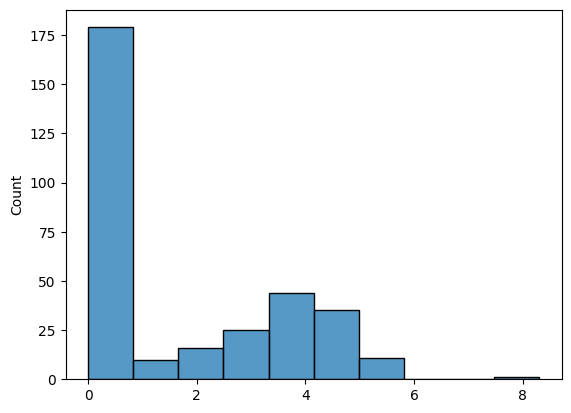

In [54]:
sns.histplot(cgr)

In [36]:
growth_rates=gr

In [37]:
cells=[32, 80, 100, 120, 400, 660, 1720, 4500, 8200, 15000, 30000, 60000, 73000, 90000, 90000, 200000, 1100000, 2600000, 6000000, 13000000]
Cell_number_dict={}
for i in range(20):
    Cell_number_dict[ts[i]]=cells[i]

growth_rates=growth_rates/growth_rates.mean()
cellular_growth_rates=growth_rates*Cell_number_dict[ts1]/Cell_number_dict[ts0]
apoptotic_cells=cellular_growth_rates[cellular_growth_rates<1]
sum_apoptotic_cells=(1-apoptotic_cells).sum()
perc_apoptotic_cells=sum_apoptotic_cells/len(growth_rates)

In [39]:
cellular_growth_rates.mean()

1.6500001

In [31]:
gr.mean()

4.625638

In [32]:
    cells=[32, 80, 100, 120, 400, 660, 1720, 4500, 8200, 15000, 30000, 60000, 73000, 90000, 90000, 200000, 1100000, 2600000, 6000000, 13000000]

In [33]:
cells[i]

400

In [34]:
cells[i+1]

660

In [22]:
ap

0.3260535599658051

In [24]:
cgr.mean()

7.6323028

In [27]:
time_tuple

(6.25, 6.5)

In [52]:
result[(3.5, 4.5)].prior_growth_rates

KeyError: (3.5, 4.5)

In [12]:
result[(3.5, 4.5)].posterior_growth_rates

array([1.516324  , 2.262105  , 2.2294652 , 0.691475  , 1.2384843 ,
       1.4204352 , 1.6313256 , 1.2801087 , 1.0793859 , 1.1423753 ,
       0.97168034, 1.4996556 , 1.286574  , 1.4681895 , 1.429768  ,
       1.1128223 , 1.9699379 , 1.5912125 , 1.95343   , 1.4232569 ,
       1.682814  , 1.6004962 , 1.2506804 , 0.8694256 , 1.3322569 ,
       1.6551878 , 1.7712559 , 1.3879583 , 1.4331118 , 1.9446353 ,
       1.6640384 , 1.5643923 , 1.4686795 , 1.3328084 , 1.4271312 ,
       1.6333454 , 1.5847415 , 1.7624072 , 1.703348  , 0.9729266 ,
       1.4094578 , 1.2636775 , 1.898906  , 1.3089905 , 1.5923388 ,
       1.3189671 , 1.5710088 , 1.2725669 , 1.8614773 , 0.87953275,
       1.036942  , 1.4957477 , 1.5409652 , 1.3872622 , 1.148727  ,
       1.9339234 , 2.047886  , 1.444325  , 1.3694967 , 0.91033375,
       1.3744962 , 2.0698364 , 1.7068255 , 1.1375473 , 1.4318004 ,
       1.6789917 , 1.0609529 , 1.1524479 , 1.4672091 , 2.089243  ,
       1.7782366 , 1.3371676 , 2.569455  , 1.9794396 , 1.00488

In [18]:
T=result[(3.5, 4.5)].solution.transport_matrix

In [20]:
T.sum(1)

Array([0.01130674, 0.01686773, 0.01662435, 0.00515608, 0.00923493,
       0.01059169, 0.01216424, 0.00954532, 0.0080486 , 0.00851829,
       0.00724548, 0.01118241, 0.00959352, 0.01094778, 0.01066128,
       0.00829793, 0.01468915, 0.01186512, 0.01456604, 0.01061273,
       0.01254815, 0.01193435, 0.0093259 , 0.00648302, 0.00993418,
       0.01234215, 0.01320764, 0.01034952, 0.01068621, 0.01450046,
       0.01240816, 0.01166513, 0.01095143, 0.00993829, 0.01064163,
       0.01217928, 0.01181686, 0.01314165, 0.01270127, 0.00725478,
       0.01050984, 0.0094228 , 0.01415947, 0.00976068, 0.01187352,
       0.00983508, 0.01171447, 0.00948909, 0.01388039, 0.00655837,
       0.00773212, 0.01115327, 0.01149046, 0.01034433, 0.00856563,
       0.01442059, 0.01527036, 0.01076983, 0.01021186, 0.00678804,
       0.01024914, 0.01543404, 0.0127272 , 0.00848229, 0.01067643,
       0.01251964, 0.00791116, 0.0085934 , 0.01094046, 0.01557875,
       0.01325969, 0.00997079, 0.01915953, 0.01475999, 0.00749

In [31]:
gr=result[(3.5, 4.5)].posterior_growth_rates

In [36]:
T.sum(1)/T.sum()

Array([0.01132012, 0.01688769, 0.01664402, 0.00516218, 0.00924586,
       0.01060422, 0.01217864, 0.00955662, 0.00805813, 0.00852838,
       0.00725405, 0.01119564, 0.00960488, 0.01096074, 0.0106739 ,
       0.00830775, 0.01470653, 0.01187916, 0.01458328, 0.01062529,
       0.012563  , 0.01194847, 0.00933694, 0.00649069, 0.00994594,
       0.01235676, 0.01322327, 0.01036177, 0.01069886, 0.01451762,
       0.01242284, 0.01167893, 0.01096439, 0.00995005, 0.01065422,
       0.0121937 , 0.01183085, 0.01315721, 0.0127163 , 0.00726336,
       0.01052228, 0.00943396, 0.01417623, 0.00977224, 0.01188757,
       0.00984672, 0.01172833, 0.00950032, 0.01389682, 0.00656614,
       0.00774127, 0.01116647, 0.01150406, 0.01035657, 0.00857577,
       0.01443766, 0.01528844, 0.01078258, 0.01022395, 0.00679608,
       0.01026127, 0.01545231, 0.01274226, 0.00849233, 0.01068907,
       0.01253446, 0.00792053, 0.00860357, 0.01095341, 0.01559719,
       0.01327538, 0.00998259, 0.01918221, 0.01477746, 0.00750

In [37]:
gr/gr.sum()

array([0.01132008, 0.01688769, 0.01664402, 0.00516219, 0.00924588,
       0.01060423, 0.01217862, 0.00955662, 0.00805813, 0.00852838,
       0.00725406, 0.01119564, 0.00960489, 0.01096074, 0.0106739 ,
       0.00830775, 0.01470653, 0.01187916, 0.01458329, 0.01062529,
       0.01256301, 0.01194847, 0.00933693, 0.00649068, 0.00994593,
       0.01235677, 0.01322327, 0.01036177, 0.01069886, 0.01451763,
       0.01242284, 0.01167894, 0.01096439, 0.00995005, 0.01065422,
       0.0121937 , 0.01183085, 0.01315721, 0.01271631, 0.00726336,
       0.01052228, 0.00943396, 0.01417624, 0.00977224, 0.01188757,
       0.00984672, 0.01172833, 0.00950032, 0.01389682, 0.00656613,
       0.00774127, 0.01116647, 0.01150404, 0.01035658, 0.0085758 ,
       0.01443766, 0.01528845, 0.01078258, 0.01022395, 0.00679608,
       0.01026127, 0.01545232, 0.01274227, 0.00849233, 0.01068907,
       0.01253447, 0.00792052, 0.00860357, 0.01095342, 0.0155972 ,
       0.01327539, 0.00998259, 0.01918221, 0.01477746, 0.00750

In [ ]:
save(dir_path[, file_prefix, overwrite])

In [140]:
tp.save(f'{Path}/moscot_maps/', f'{ts0}')

INFO     Successfully saved the problem as                                                                         
         `/home/icb/manuel.gander/moscotTime_Reproducibility/Data/moscot_maps/E3.5_TemporalProblem.pkl`            


In [144]:
tp=tp.load(f'{Path}/moscot_maps/{ts0}_TemporalProblem.pkl')

In [148]:
tp[(3.5, 4.5)].prior_growth_rates

array([1.74635174, 2.58819747, 2.28579773, 1.10982672, 1.77890424,
       1.36235977, 2.01571155, 1.64890756, 1.45195649, 1.66700088,
       1.03753039, 1.5426195 , 1.65465152, 1.35361   , 1.43312474,
       1.03071585, 1.84696893, 1.47390778, 1.79060743, 1.3101418 ,
       1.78467567, 1.60605323, 1.28677735, 1.21873822, 1.22032073,
       1.5157602 , 1.61381278, 1.26514752, 1.75844924, 1.83664127,
       1.5410088 , 1.44346247, 1.35858502, 1.21669276, 1.77446452,
       1.54702357, 1.45859248, 1.62241706, 1.56301952, 0.8905782 ,
       1.30606454, 1.16530294, 1.74136154, 1.27472795, 1.47030881,
       1.36049107, 1.50054964, 1.16731084, 1.71458029, 0.89891862,
       1.27368849, 1.36723378, 1.44226697, 1.2712985 , 1.1730001 ,
       1.78454436, 1.90461412, 1.32664719, 1.31688386, 0.83342317,
       1.26541533, 1.90625208, 1.61279114, 1.05491114, 1.45819064,
       1.81738972, 1.00426039, 1.06404513, 1.39366979, 1.93536837,
       1.64538766, 1.22999253, 2.34962313, 1.80549249, 0.96383